In [1]:
from sklearn import linear_model

import numpy as np
from dateutil.parser import parse
import pickle
#citibike_path ='/Users/mohit/Documents/workspace/ProbStat/project/citibikes_demo_weather_clean.csv'
citibike_path = '/Users/mohit/Documents/workspace/ProbStat/project/taxi_clean.csv'
from collections import defaultdict
from dateutil.parser import parse
import datetime

base = datetime.datetime(1970,1,1)
# In[34]:
def getTime(dateString):
    dt = parse(dateString)
    return (dt-base).total_seconds()


citibike = open(citibike_path, 'r')
credit = dict()
cash = dict()
index = 0
for data in citibike:
    try:
        if index!=0:
            arr = data.split(',')
            if len(arr) > 10:
                pickuptime = arr[0]
                amount = arr[8]
                typepay = arr[9]
                if (pickuptime is not None and len(pickuptime)>0) and (amount is not None and len(amount)>0) and (typepay is not None and len(typepay)>0):
                    seconds = getTime(pickuptime)
                    startofday = seconds - seconds%86400
                    arr = np.array([float(amount),1])
                    zeros = np.zeros(2)
                    if typepay == '1':
                        if startofday in credit:
                            credit[startofday] += arr
                        else:
                            credit[startofday] =arr
                            
                        if startofday in cash:
                            cash[startofday] += zeros
                        else:
                            cash[startofday] =zeros
                    if typepay == '2':
                        if startofday in cash:
                            cash[startofday] += arr
                        else:
                            cash[startofday] =arr
                            
                        if startofday in credit:
                            credit[startofday] += zeros
                        else:
                            credit[startofday] =zeros
    except Exception as e:
        print(e)
                            
    index +=1
            
credit_list = sorted(credit.items()) # sorted by key, return a list of tuples

credit_time, credit_amount = zip(*credit_list) # unpack a list of pairs into two tuples


cash_list = sorted(cash.items()) # sorted by key, return a list of tuples

cash_time, cash_amount = zip(*cash_list)

#pickle.dump([credit_time, credit_amount,cash_time,cash_amount], open('/Users/mohit/Documents/workspace/ProbStat/project/creditvscash', 'wb'))

            

            
            

        
  
    
    



(array([ 222.35,    8.  ]),
 array([ 187.77,   10.  ]),
 array([ 226.56,    9.  ]),
 array([ 395.34,   14.  ]),
 array([ 584.22,   24.  ]),
 array([ 212.63,   11.  ]),
 array([ 579.38,   31.  ]),
 array([ 652.47,   34.  ]),
 array([ 1206.2,    58. ]))

In [7]:
def movingAverage(aggregatedRes, k):
    size = len(aggregatedRes)
    if(size <= k):
        return aggregatedRes
    
    res = list()
    sum1 = 0
    for i in range(0, k):
        sum1 = sum1 + aggregatedRes[i];
    index = 0;
    res.append(sum1 / k);
        
    for i in range(k, size):
        sum1 = sum1 - aggregatedRes[index];
        sum1 = sum1 + aggregatedRes[i];
        res.append(sum1 / k);
        index = index + 1;
        
    return res;

In [10]:
import matplotlib.pyplot as plt
import numpy as np
get_ipython().magic(u'matplotlib inline')
credit_avg_sum = []
credit_count = []

for i in range(len(credit_amount)):
    
    ele = credit_amount[i]
    sum  = ele[0]
    count = ele[1]
    avg = 0.0
    if count !=0.0:
        avg = sum /count
        
    credit_avg_sum.append(sum)
    credit_count.append(count)
    
cash_avg_sum = []
cash_count = []

for i in range(len(cash_amount)):
    
    ele = cash_amount[i]
    sum  = ele[0]
    count = ele[1]
    avg = 0.0
    if count !=0.0:
        avg = sum /count
        
    cash_avg_sum.append(sum)
    cash_count.append(count)
    
        
    
        

    


In [15]:
len(cash_avg_sum)

631

In [13]:
from scipy.stats import ks_2samp

print(ks_2samp(credit_avg_sum, cash_avg_sum))

print(ks_2samp(credit_count, cash_count))


Ks_2sampResult(statistic=0.22028526148969885, pvalue=6.5082156987858353e-14)
Ks_2sampResult(statistic=0.25673534072900162, pvalue=9.5646011014723625e-19)


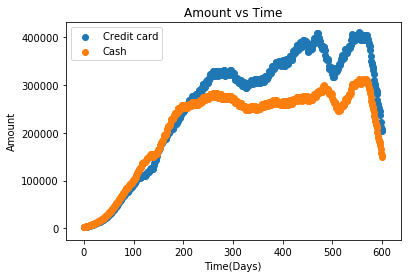

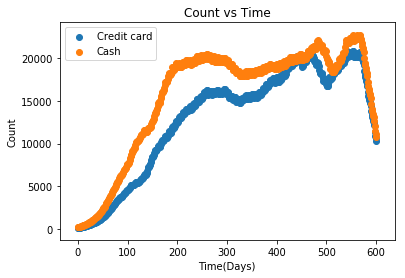

In [14]:
size = len(credit_avg_sum)
x = []
for i  in range(size-29):
    x.append(i)

plt.scatter(x,movingAverage(credit_avg_sum,30),label="Credit card")
plt.scatter(x,movingAverage(cash_avg_sum,30),label="Cash")
plt.xlabel('Time(Days)')
plt.ylabel('Amount')
plt.legend()
plt.title('Amount vs Time')
#plt.savefig('/Users/mohit/Documents/workspace/ProbStat/project/amount.png')
plt.show()

plt.scatter(x,movingAverage(credit_count,30),label="Credit card")
plt.scatter(x,movingAverage(cash_count,30),label="Cash")
plt.xlabel('Time(Days)')
plt.ylabel('Count')
plt.legend()
plt.title('Count vs Time')
#plt.savefig('/Users/mohit/Documents/workspace/ProbStat/project/count.png')
plt.show()

In [ ]:
z = np.polyfit(credit_avg_sum, 3)  

p = np.poly1d(z)

plt.plot(p(credit_avg_sum),label="Credit card")

plt.show()